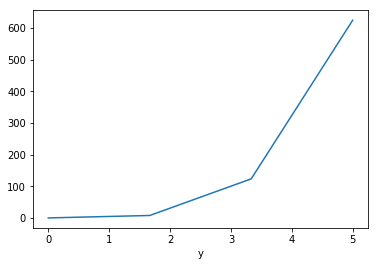

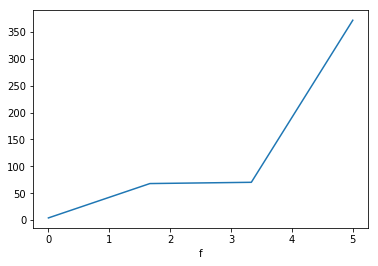

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def fun(x,t):
    dydt = t**x
    return dydt

t  = np.linspace(0, 5., 4)

f = odeint(fun,4,t)
y = (fun(4,t))

plt.figure()
plt.xlabel("y")
plt.plot(t, y, label='y')

plt.figure()
plt.xlabel("f")
plt.plot(t, f, label='f')


# Es una Prueba no entiendo por que los gráficos salen difrentes y con odient no me convence si esta bién o mal

# Programación para la Bioinformática

Módulo 4: Librerías científicas en Python - Scipy - Ejercicios
-------------------------------------------------

Ejercicios
----------

A continuación tenéis el único ejercicio a resolver en esta parte del módulo. Dada la especificidad de los algoritmos que se implementan en la librería Scipy, hemos seleccionado un problema más simple que los mostrados como ejemplo.

### Ejercicio 1: Calculando los átomos en la interfaz de unión de dos proteínas
Dos proteínas A y B se unen para formar un complejo proteico. Se define la interfaz de unión entre A y B como los átomos de A que están a una distancia de 4Å (Angstroms) o menos de cualquier átomo de B. En la siguiente figura, la proteína A está representada en azul y la proteína B en naranja. Los átomos de B que están en contacto con algún átomo de A se han coloreado en verde:

<img src="files/media/interfaz_1ppe.png">

A continuación, tenéis el código que tendréis que completar. Tenéis que calcular el número de átomos de A y de B que están en contacto con átomos de B y de A respectivamente y el número total de átomos en la interfaz. **Pista**: podéis utilizar la función _scipy.spatial.distance.cdist_ (http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist) y la función _numpy.where_.



In [6]:
import numpy as np
import os
import scipy.spatial


def lee_coordenadas_atomo(linea):
    """Interpreta las coordenadas de una línea de un fichero PDB que empiece por 
    ATOM (es un átomo)"""
    if linea.startswith('ATOM  '):
        x = float(linea[30:38])
        y = float(linea[38:46])
        z = float(linea[46:54])
        return [x, y, z]

    
def obtiene_coordenadas(estructura):
    """Lee una estructura (fichero PDB) y obtiene las coordenadas de los 
    átomos que contiene"""
    coordenadas = []
    with open(estructura) as input:
        lineas = [linea.rstrip(os.linesep) for linea in input.readlines()]
        for linea in lineas:
            atomo = lee_coordenadas_atomo(linea)
            if atomo:
                coordenadas.append(atomo)
    return np.array(coordenadas)

# Coordenadas_1 tiene las coordenadas de la proteína A en formato numpy
coordenadas_1 = obtiene_coordenadas('data/1PPE_rec.pdb')

# Coordenadas_2 tiene las coordenadas de la proteína B en formato numpy
coordenadas_2 = obtiene_coordenadas('data/1PPE_lig.pdb')

# Código a completar:
A_B = 0 
B_A = 0 

for coord_1 in coordenadas_1:
    for coord_2 in coordenadas_2:
        if np.all(coord_1 == coord_2)
        A_B +=1
for coord_2 in coordenadas_2:
    for coord_1 in coordenadas_1:
            if np.all(coord_1 == coord_2)
            B_A += 1          


atomos_A_B = A_B
print("Número de átomos de A en contacto con B: ", atomos_A_B)

atomos_B_A = B_A
print("Número de átomos de B en contacto con A: ", atomos_B_A)

# Finalmente, el número de átomos total será la suma de ambos:
print("Número total de átomos en contacto: ", atomos_A_B + atomos_B_A)

SyntaxError: invalid syntax (<ipython-input-6-95e0796cb0d6>, line 40)